In [1]:
# Centralized sonar defaults (inserted by sweep)
from utils.sonar_config import SONAR_VIS_DEFAULTS
sonar_config = SONAR_VIS_DEFAULTS.copy()
# Backwards-compatible variable names used in older notebooks
RANGE_MIN_M = sonar_config['range_min_m']
RANGE_MAX_M = sonar_config['range_max_m']
DISPLAY_RANGE_MAX_M = sonar_config['display_range_max_m']

# Optional: override defaults below, e.g.
# RANGE_MAX_M = 30.0


# SOLAQUA — Sonar Visualizer

This notebook provides an easy-to-use interface for visualizing sonar data from **Sonoptix** and **Ping360** systems.

1. **Run the setup cell** to scan for available sonar files
2. **Configure your settings** in the configuration cell
3. **Visualize your data** using the plotting cells
4. **Analyze statistics** to understand your data quality

All the heavy lifting is now handled by the `sonar_visualization` utility module!

In [ ]:
from pathlib import Path
from utils.sonar_config import EXPORTS_DIR_DEFAULT, EXPORTS_SUBDIRS

EXPORTS_FOLDER = Path(EXPORTS_DIR_DEFAULT)
# Find candidate sonar CSVs using the configured exports 'by_bag' folder
candidates = find_sonar_files()

# Show a short sample
candidates[:10]

✅ Sonar visualization utilities loaded

🔍 Scanning for sonar files...
[0] exports/by_bag/sensor_ping360__2024-08-20_13-39-34_data.csv
[1] exports/by_bag/sensor_ping360__2024-08-20_13-40-35_data.csv
[2] exports/by_bag/sensor_ping360_config__2024-08-20_13-39-34_data.csv
[3] exports/by_bag/sensor_ping360_config__2024-08-20_13-40-35_data.csv
[4] exports/by_bag/sensor_ping360_config__2024-08-22_14-06-43_data.csv
[5] exports/by_bag/sensor_ping360_config__2024-08-22_14-29-05_data.csv
[6] exports/by_bag/sensor_ping360_config__2024-08-22_14-47-39_data.csv
[7] exports/by_bag/sensor_sonoptix_echo_image__2024-08-20_13-39-34_video.csv
[8] exports/by_bag/sensor_sonoptix_echo_image__2024-08-20_13-40-35_video.csv
[9] exports/by_bag/sensor_sonoptix_echo_image__2024-08-22_14-06-43_video.csv
[10] exports/by_bag/sensor_sonoptix_echo_image__2024-08-22_14-29-05_video.csv
[11] exports/by_bag/sensor_sonoptix_echo_image__2024-08-22_14-47-39_video.csv

✅ Found 12 sonar files
💡 Copy one of the paths above to use

## Configuration and Data Selection

Set your file path and visualization parameters here. The configuration is organized into logical groups for easy adjustment.

In [3]:
# Use centralized sonar defaults (replaces local dict)
from utils.sonar_config import SONAR_VIS_DEFAULTS
sonar_config = SONAR_VIS_DEFAULTS.copy()
# Backwards-compatible names
RANGE_MIN_M = sonar_config['range_min_m']
RANGE_MAX_M = sonar_config['range_max_m']
DISPLAY_RANGE_MAX_M = sonar_config['display_range_max_m']

print(f"📐 FOV: {sonar_config['fov_deg']}°, Range: {RANGE_MIN_M}-{RANGE_MAX_M}m (display max {DISPLAY_RANGE_MAX_M}m)")


📐 FOV: 120.0°, Range: 0.0-20.0m (display max 10.0m)


In [4]:
# === Raw and Enhanced Intensity Display ===
import matplotlib.pyplot as plt

# Load data and extract frame
df = viz.load_sonar_data(DATA_FILE)
frame_data = viz.get_frame_data(df, FRAME_INDEX)

print(f"📊 Frame {FRAME_INDEX} shape: {frame_data.shape}")
print(f"📈 Data range: {frame_data.min():.3f} to {frame_data.max():.3f}")

# Create side-by-side visualization
fig = viz.plot_raw_and_enhanced(frame_data, FRAME_INDEX)
plt.show()

# Store data for cone view
current_frame_data = frame_data
print("✅ Frame data loaded and ready for cone visualization")

NameError: name 'viz' is not defined

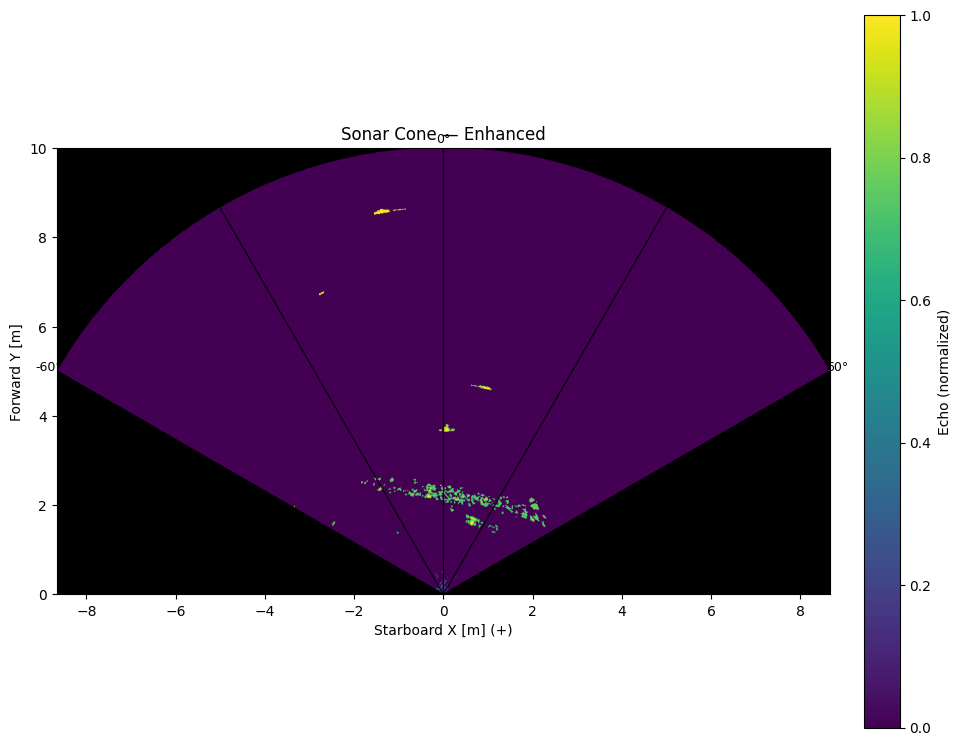

✅ Cone view displayed
💡 The cone shows the sonar data mapped to real-world coordinates
   - X-axis: Starboard direction (positive to the right)
   - Y-axis: Forward direction
   - Black lines: Beam angle references
   - Black areas: Outside the sonar's field of view


In [ ]:
# === Geometric Cone View ===
import matplotlib.pyplot as plt

# Create cone visualization (using enhanced data by default)
fig = viz.plot_cone_view(current_frame_data, use_enhanced=True)
plt.show()

print("✅ Cone view displayed")
print("💡 The cone shows the sonar data mapped to real-world coordinates")
print("   - X-axis: Starboard direction (positive to the right)")  
print("   - Y-axis: Forward direction")
print("   - Black lines: Beam angle references")
print("   - Black areas: Outside the sonar's field of view")

In [ ]:
# === Frame Statistics and Analysis ===
from utils.sonar_visualization import analyze_bag_directly

# Analyze the specific frame we're visualizing
BAG_PATH = "data/2024-08-20_13-39-34_video.bag"  # Adjust path as needed
TOPIC = "/sensor/sonoptix_echo/image"

print(f"🔍 Analyzing frame {FRAME_INDEX} from bag file...")

try:
    # Direct bag analysis
    stats = analyze_bag_directly(BAG_PATH, TOPIC, FRAME_INDEX)
    
    print("📊 Frame Analysis Results:")
    print(f"   Data type: {stats['dtype']}")
    print(f"   Array shape: {stats['shape']}")
    print(f"   Value range: {stats['min_max'][0]:.3f} to {stats['min_max'][1]:.3f}")
    print(f"   Max fractional part: {stats['max_fractional_part']:.6f}")
    print(f"   Unique values: {stats['unique_count']}")
    print(f"   First 10 unique values: {stats['first_50_unique'][:10]}")
    
    # Also get statistics from our processed frame
    frame_stats = viz.analyze_frame_statistics(df, FRAME_INDEX)
    print(f"\n📈 Processed Frame Statistics:")
    print(f"   Non-zero ratio: {frame_stats['nonzero_ratio']:.1%}")
    print(f"   Mean intensity: {frame_stats['mean_value']:.3f}")
    print(f"   Standard deviation: {frame_stats['std_value']:.3f}")
    
except FileNotFoundError:
    print(f"⚠️  Bag file not found: {BAG_PATH}")
    print("   Update BAG_PATH to point to your actual bag file")
except Exception as e:
    print(f"❌ Error analyzing bag: {e}")
    
    # Fallback to CSV analysis only
    frame_stats = viz.analyze_frame_statistics(df, FRAME_INDEX)
    print(f"\n📈 CSV Frame Statistics:")
    for key, value in frame_stats.items():
        if isinstance(value, float):
            if 'ratio' in key or 'percent' in key:
                print(f"   {key}: {value:.1%}")
            else:
                print(f"   {key}: {value:.3f}")
        else:
            print(f"   {key}: {value}")

🔍 Analyzing frame 530 from bag file...
📊 Frame Analysis Results:
   Data type: float32
   Array shape: (262144,)
   Value range: 0.000 to 52.000
   Max fractional part: 0.000000
   Unique values: 42
   First 10 unique values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

📈 Processed Frame Statistics:
   Non-zero ratio: 1.4%
   Mean intensity: 0.034
   Standard deviation: 0.570
